# Kaggle_HomeCreditDefaultRisk

## 参考

- [Start Here: A Gentle Introduction](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction)
- [Home Credit : Complete EDA + Feature Importance](https://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance)

- [僕らのKaggle奮闘記~Home Credit Default Risk編~#1](https://qiita.com/sakigakeman/items/dd74191ceea2a5f24274)
- [僕らのKaggle奮闘記~Home Credit Default Risk編~#2](https://qiita.com/sakigakeman/items/a7734d46c12f70ebd4a2)
- [＜実践＞HomeCredit作業記録（５） - FeatureEngineering続き](http://kurupical.hatenablog.com/entry/2018/06/04/220619)
- [＜実践＞HomeCredit作業記録（６） - 進捗とメモ](http://kurupical.hatenablog.com/entry/2018/06/15/205723)

- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [KaggleチュートリアルTitanicで上位1%に入った話。(0.87081)](https://lp-tech.net/articles/JsWwf)
- [KaggleチュートリアルTitanicで上位3%以内に入るには。(0.82297)](https://lp-tech.net/articles/0QUUd)
- [kaggleを試してみた](https://www.lancard.com/blog/2018/06/11/kaggle%E3%82%92%E8%A9%A6%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/)
- [kaggle初心者の私が3ヶ月でソロゴールドを獲得した方法](https://www.rco.recruit.co.jp/career/engineer/blog/kaggle_by_novice_engineer/)
- [Kaggle Masterに学ぶ実践的機械学習[Kaggle TalkingData Competition編]](https://qiita.com/keitakurita/items/f10e658843930b888814#%E7%89%B9%E5%BE%B4%E9%87%8F%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%8B%E3%82%A2%E3%83%AA%E3%83%B3%E3%82%B0)
- [パワーアップしたKernelでKaggleに飛び込もう](https://qiita.com/jagainu/items/2a1e3779f944588d29de)


## データ／情報取得

https://www.kaggle.com/c/home-credit-default-risk から必要なデータを取得する。

## データアップロード

必要なCSVファイルをアップロードする。  
データサイズが大きいのでGoogle Driveから取得する。

### 参考
- [ColaboratoryからGoogle Driveのファイルを読み書きする](https://qiita.com/kakinaguru_zo/items/33dbe24276915124f545)
- [Google Colaboratory内で画像やCSVファイルにアクセスするのが一苦労だった話](https://qiita.com/yoshizaki_kkgk/items/bf01842d1a80c0f9e56c)

In [0]:
# 直接アップロード(時間がかかる)
from google.colab import files
uploaded = files.upload()

In [0]:
# Google Driveから取得(速い)
import google.colab
import googleapiclient.discovery
import googleapiclient.http

#  認証必須
google.colab.auth.authenticate_user()
drive = googleapiclient.discovery.build('drive', 'v3')

def getFile(filename, fileid):
  print(filename)
  with open(filename, 'wb') as f:
    request = drive.files().get_media(fileId=fileid)
    media = googleapiclient.http.MediaIoBaseDownload(f, request)
    done = False
    while not done:
      progress_status, done = media.next_chunk()
      print(100*progress_status.progress(), end="")
      print("%完了")

In [0]:
getFile('application_train.csv', '1SkVWU7oJZTppW3h6z0KV8SVqOtquXDqq')
getFile('application_test.csv', '12ddtzKdohRseFLZk5cEFBDyTQX9_LZ1D')
getFile('bureau_balance.csv', '1SFVTJDPTD-NS6N8Zvwg6onZW204Ytbw7')
getFile('bureau.csv', '19t-a7lXhV7olzR7Ft7LdoRsY8LfRWfRY')
getFile('credit_card_balance.csv', '1bOtN9wPqmF6cbsaS3XxuBAAMztT5A1fb')
#getFile('HomeCredit_columns_description.csv', '17h2P3Z_PzzlMpy_qmtINQFsQ7DKZF3Mr')
getFile('installments_payments.csv', '1YkFOez-hxmmtBefKD47P87Itt6DjBsCh')
getFile('POS_CASH_balance.csv', '1kqWilSAlgt-DUS05T0Fo65B6E8b2WLEH')
getFile('previous_application.csv', '1vUpcaP8rB5wNA70Ts7cDqJntf1gazCff')
#getFile('sample_submission.csv', '1U6Wd9tFqc3UtNzcOunv8YZq1aJDTAlbU')

### データを確認する

- [pandasで欠損値NaNが含まれているか判定、個数をカウント](https://note.nkmk.me/python-pandas-nan-judge-count/)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

train_chk = pd.read_csv("application_train.csv", encoding="UTF-8")
test_chk = pd.read_csv("application_test.csv", encoding="UTF-8")
#bureau_chk = pd.read_csv("bureau.csv", encoding="UTF-8")
#bb_chk = pd.read_csv("bureau_balance.csv", encoding="UTF-8")

display(train_chk.head(3))
display(test_chk.head(3))
#display(bureau_chk.head(3))
#display(bb_chk.head(3))

In [0]:
# NaNが１つ以上含まれるカラム
for (col, sum) in zip(train_chk.columns, train_chk.isnull().sum()):
  if sum > 0:
    display(col + ":" + str(sum))

for (col, sum) in zip(test_chk.columns, test_chk.isnull().sum()):
  if sum > 0:
    display(col + ":" + str(sum))

In [0]:
# カラムごとに確認
#display(train_chk['EXT_SOURCE_1'])
#display(train_chk[train_df['AMT_ANNUITY'].isnull()])
#display(train_chk['AMT_ANNUITY'].value_counts(dropna=False))
#display(test_chk['AMT_ANNUITY'].value_counts(dropna=False))
col = 'EXT_SOURCE_1'
display(train_chk[col].value_counts(dropna=False))
display(test_chk[col].value_counts(dropna=False))
train_chk[col].dtype

In [51]:
# カテゴリごとのTARGET='1'の割合
train_grouped = train_chk.groupby('NAME_CONTRACT_TYPE')
rateoftarger1 = 100 * train_grouped['TARGET'].sum() / train_grouped['TARGET'].size()
display(rateoftarger1.reset_index().rename(columns={'TARGET': 'NEW_TARGET_RATEofTARGETis1'}))

,NAME_CONTRACT_TYPE,NEW_TARGET_RATEofTARGETis1
0,Cash loans,8.345913
1,Revolving loans,5.478329


In [0]:
import math 
train_chk['EXT_SOURCE_1_FLG'] = train_chk['EXT_SOURCE_1'].apply(lambda x: "1" if math.isnan(x) else "0")
display(train_chk['EXT_SOURCE_1_FLG'].value_counts())

0:90.68809972935291
1:9.311900270647092
0:92.23349800848523
1:7.766501991514768


0:92.12121212121212
1:7.878787878787879
0:91.92670058106377
1:8.073299418936227


0:91.48046464949417
1:8.519535350505832
0:92.50445453393274
1:7.495545466067262


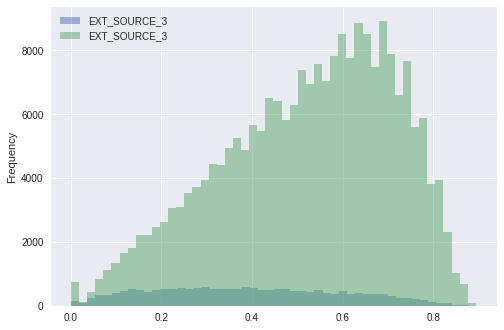

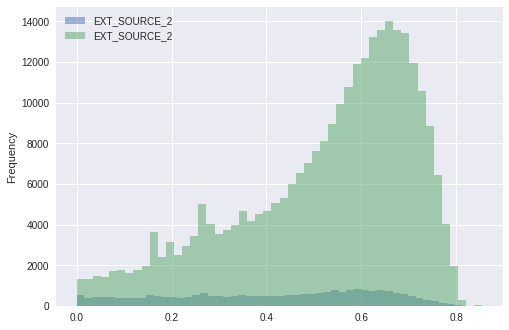

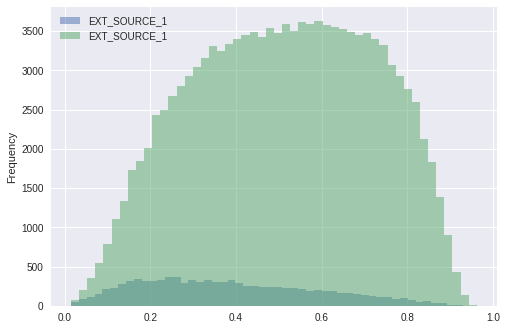

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

tar1 =  train_chk[train_chk['TARGET'] == 1]
tar0 =  train_chk[train_chk['TARGET'] == 0]

# EXT_SOURCE_3
axt3 = tar1.plot( y=['EXT_SOURCE_3'], bins=50, alpha=0.5, kind='hist')
display(tar0.plot( y=['EXT_SOURCE_3'], bins=50, alpha=0.5, kind='hist', ax=axt3))

ext3on =  train_chk[train_chk['EXT_SOURCE_3'].notnull()]
ext3off =  train_chk[train_chk['EXT_SOURCE_3'].isnull()]

ext3off_vc = ext3off['TARGET'].value_counts(dropna=False)
ext3off_vcsum = ext3off_vc.sum()
for idx, cnt in zip(ext3off_vc.index, ext3off_vc):
  print(str(idx) + ":" + str(cnt * 100 / ext3off_vcsum))

ext3on_vc = ext3on['TARGET'].value_counts(dropna=False)
ext3on_vcsum = ext3on_vc.sum()
for idx, cnt in zip(ext3on_vc.index, ext3on_vc):
  print(str(idx) + ":" + str(cnt * 100 / ext3on_vcsum))

# EXT_SOURCE_2
axt2 = tar1.plot( y=['EXT_SOURCE_2'], bins=50, alpha=0.5, kind='hist')
display(tar0.plot( y=['EXT_SOURCE_2'], bins=50, alpha=0.5, kind='hist', ax=axt2))

ext2on =  train_chk[train_chk['EXT_SOURCE_2'].notnull()]
ext2off =  train_chk[train_chk['EXT_SOURCE_2'].isnull()]

ext2off_vc = ext2off['TARGET'].value_counts(dropna=False)
ext2off_vcsum = ext2off_vc.sum()
for idx, cnt in zip(ext2off_vc.index, ext2off_vc):
  print(str(idx) + ":" + str(cnt * 100 / ext2off_vcsum))

ext2on_vc = ext2on['TARGET'].value_counts(dropna=False)
ext2on_vcsum = ext2on_vc.sum()
for idx, cnt in zip(ext2on_vc.index, ext2on_vc):
  print(str(idx) + ":" + str(cnt * 100 / ext2on_vcsum))

# EXT_SOURCE_1
axt1 = tar1.plot( y=['EXT_SOURCE_1'], bins=50, alpha=0.5, kind='hist')
display(tar0.plot( y=['EXT_SOURCE_1'], bins=50, alpha=0.5, kind='hist', ax=axt1))

ext1on =  train_chk[train_chk['EXT_SOURCE_1'].notnull()]
ext1off =  train_chk[train_chk['EXT_SOURCE_1'].isnull()]

ext1off_vc = ext1off['TARGET'].value_counts(dropna=False)
ext1off_vcsum = ext1off_vc.sum()
for idx, cnt in zip(ext1off_vc.index, ext1off_vc):
  print(str(idx) + ":" + str(cnt * 100 / ext1off_vcsum))

ext1on_vc = ext1on['TARGET'].value_counts(dropna=False)
ext1on_vcsum = ext1on_vc.sum()
for idx, cnt in zip(ext1on_vc.index, ext1on_vc):
  print(str(idx) + ":" + str(cnt * 100 / ext1on_vcsum))


### 多重共線性を除く

lightGBMにはあまり効果がない？

- [不動産価格を機械学習で予測するKaggleに挑戦する [発展編2:上位3%]](http://www.mizugarasu.jp/entry/house_prices_top3percentile)

In [0]:
# 相関係数行列の可視化
fig, ax = plt.subplots(1, 1, figsize=(100, 100))
sns.heatmap(train_chk.corr(), vmax=1, vmin=-1, center=0, annot=True, ax=ax)

In [0]:
import gc
del train_chk, test_chk, bureau_chk, bb_chk
gc.collect()

## 前処理

### 補完、整形

- TARGET=0の数が多い -> TARGET=1と同数だけサンプリングする。
- NaNを含むカラムが多い -> NaNもダミー変数にする。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = None
import gc
import time
import math
from contextlib import contextmanager
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# カラムタイプごとに分類
CATEGORICAL_COLUMNS = ['CODE_GENDER',
                       #'EMERGENCYSTATE_MODE',
                       'FLAG_CONT_MOBILE',
                       #'FLAG_DOCUMENT_3',
                       #'FLAG_DOCUMENT_4',
                       #'FLAG_DOCUMENT_5',
                       #'FLAG_DOCUMENT_6',
                       #'FLAG_DOCUMENT_7',
                       #'FLAG_DOCUMENT_8',
                       #'FLAG_DOCUMENT_9',
                       #'FLAG_DOCUMENT_11',
                       #'FLAG_DOCUMENT_18',
                       'FLAG_EMAIL',
                       'FLAG_EMP_PHONE',
                       'FLAG_MOBIL',
                       'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY',
                       'FLAG_PHONE',
                       'FLAG_WORK_PHONE',
                       #'FONDKAPREMONT_MODE',
                       'HOUR_APPR_PROCESS_START',
                       #'HOUSETYPE_MODE',
                       'LIVE_CITY_NOT_WORK_CITY',
                       'LIVE_REGION_NOT_WORK_REGION',
                       'NAME_CONTRACT_TYPE',
                       'NAME_TYPE_SUITE',
                       'NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS',
                       'NAME_HOUSING_TYPE',
                       'OCCUPATION_TYPE',
                       'ORGANIZATION_TYPE',
                       'REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY',
                       'REG_REGION_NOT_LIVE_REGION',
                       'REG_REGION_NOT_WORK_REGION',
                       #'WALLSMATERIAL_MODE',
                       'WEEKDAY_APPR_PROCESS_START']

NUMERICAL_COLUMNS = ['AMT_ANNUITY',
                     'AMT_CREDIT',
                     'AMT_INCOME_TOTAL',
                     'AMT_REQ_CREDIT_BUREAU_HOUR',
                     'AMT_REQ_CREDIT_BUREAU_DAY',
                     'AMT_REQ_CREDIT_BUREAU_WEEK',
                     'AMT_REQ_CREDIT_BUREAU_MON',
                     'AMT_REQ_CREDIT_BUREAU_QRT',
                     'AMT_REQ_CREDIT_BUREAU_YEAR',
                     'APARTMENTS_AVG',
                     'BASEMENTAREA_AVG',
                     'COMMONAREA_AVG',
                     'CNT_CHILDREN',
                     'CNT_FAM_MEMBERS',
                     'DAYS_BIRTH',
                     'DAYS_EMPLOYED',
                     'DAYS_ID_PUBLISH',
                     'DAYS_LAST_PHONE_CHANGE',
                     'DAYS_REGISTRATION',
                     'DEF_30_CNT_SOCIAL_CIRCLE',
                     'DEF_60_CNT_SOCIAL_CIRCLE',
                     'ELEVATORS_AVG',
                     'ENTRANCES_AVG',
                     'EXT_SOURCE_1',
                     'EXT_SOURCE_2',
                     'EXT_SOURCE_3',
                     'FLOORSMAX_AVG',
                     'FLOORSMIN_AVG',
                     'LANDAREA_AVG',
                     'LIVINGAPARTMENTS_AVG',
                     'LIVINGAREA_AVG',
                     'NONLIVINGAPARTMENTS_AVG',
                     'NONLIVINGAREA_AVG',
                     'OBS_30_CNT_SOCIAL_CIRCLE',
                     'OWN_CAR_AGE',
                     'REGION_POPULATION_RELATIVE',
                     'REGION_RATING_CLIENT',
                     'TOTALAREA_MODE',
                     'YEARS_BEGINEXPLUATATION_AVG',
                     'YEARS_BUILD_AVG']

USELESS_CATEGORICAL_COLUMNS = ['FLAG_DOCUMENT_2',
                               'FLAG_DOCUMENT_10',
                               'FLAG_DOCUMENT_12',
                               'FLAG_DOCUMENT_13',
                               'FLAG_DOCUMENT_14',
                               'FLAG_DOCUMENT_15',
                               'FLAG_DOCUMENT_16',
                               'FLAG_DOCUMENT_17',
                               'FLAG_DOCUMENT_19',
                               'FLAG_DOCUMENT_20',
                               'FLAG_DOCUMENT_21']

USEFUL_NUMERICAL_COLUMNS = ['AMT_GOODS_PRICE',
                            'APARTMENTS_MEDI',
                            'APARTMENTS_MODE',
                            'BASEMENTAREA_MEDI',
                            'BASEMENTAREA_MODE',
                            'COMMONAREA_MEDI',
                            'COMMONAREA_MODE',
                            'ELEVATORS_MEDI',
                            'ELEVATORS_MODE',
                            'ENTRANCES_MEDI',
                            'ENTRANCES_MODE',
                            'FLAG_EMP_PHONE',
                            'FLOORSMAX_MEDI',
                            'FLOORSMAX_MODE',
                            'FLOORSMIN_MEDI',
                            'FLOORSMIN_MODE',
                            'LANDAREA_MEDI',
                            'LANDAREA_MODE',
                            'LIVINGAPARTMENTS_MEDI',
                            'LIVINGAPARTMENTS_MODE',
                            'LIVINGAREA_MEDI',
                            'LIVINGAREA_MODE',
                            'NONLIVINGAPARTMENTS_MEDI',
                            'NONLIVINGAPARTMENTS_MODE',
                            'NONLIVINGAREA_MEDI',
                            'NONLIVINGAREA_MODE',
                            'OBS_60_CNT_SOCIAL_CIRCLE',
                            'REGION_RATING_CLIENT_W_CITY',
                            'YEARS_BEGINEXPLUATATION_MEDI',
                            'YEARS_BEGINEXPLUATATION_MODE',
                            'YEARS_BUILD_MEDI',
                            'YEARS_BUILD_MODE']

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype=='object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

def application_train_test(num_rows=None, nan_as_category=False, random_state=0):
    df_ = pd.read_csv('application_train.csv', nrows=num_rows)
    test_df = pd.read_csv('application_test.csv', nrows=num_rows)
    df1_ = df_[df_['TARGET'] == 1]
    df0_ = df_[df_['TARGET'] == 0]
    df0_sub_ = df0_.sample(n=len(df1_), random_state=random_state)
    df = df1_.append(df0_sub_)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()

    # レアな値をもつ行は削除する
    #df = df[df['NAME_FAMILY_STATUS'] != 'Unknown']
    #df.dropna(subset=['CNT_FAM_MEMBERS'], inplace=True)
    # 不要そうな列を削除する
    #df.drop('FLAG_MOBIL', axis=1, inplace=True)
    #df.drop('FLAG_CONT_MOBILE', axis=1, inplace=True)
    # 相関が高い項目は一つに絞る
    #df.drop('AMT_ANNUITY', axis=1, inplace=True)
    #df.drop('AMT_GOODS_PRICE', axis=1, inplace=True)
    #df.drop('CNT_FAM_MEMBERS', axis=1, inplace=True)
    #df.drop('FLAG_EMP_PHONE', axis=1, inplace=True)
    #df.drop('REGION_RATING_CLIENT_W_CITY', axis=1, inplace=True)
    #df.drop('LIVE_CITY_NOT_WORK_CITY', axis=1, inplace=True)
    # 質的数値データを文字列へ
    df['REGION_RATING_CLIENT'] = df['REGION_RATING_CLIENT'].astype(str)
    # https://github.com/neptune-ml/open-solution-home-credit/blob/master/src/data_cleaning.py
    df['CODE_GENDER'].replace('XNA', np.nan, inplace=True)
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
    #df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
    df['NAME_FAMILY_STATUS'].replace('Unknown', np.nan, inplace=True)
    df['ORGANIZATION_TYPE'].replace('XNA', np.nan, inplace=True)

    """松本さん案(ここから)"""
    # TARGETとの相関関係の低い(絶対値が0.001未満)のcolumnを削除
    df = df.drop(["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5",
                              "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9",
                              "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13",
                              "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
                              "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"], axis=1)
    df = df.drop(["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK"], axis=1)
    # 欠損率40%以上のcolumnを削除
    df = df.drop(["OWN_CAR_AGE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI",
                              "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI",
                              "FLOORSMAX_MEDI","FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI",
                              "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE",
                              "HOUSETYPE_MODE", "TOTALAREA_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"], axis=1)
    df = df.drop(["LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG",
                              "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE",
                              "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE",
                              "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE",
                              "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE"], axis=1)
    df = df.drop(["APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG",
                              "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG",
                              "FLOORSMAX_AVG", "FLOORSMIN_AVG",
                              #"EXT_SOURCE_1"
                 ], axis=1)
    df.fillna({'AMT_ANNUITY': df['AMT_ANNUITY'].mean()}, inplace=True)
    df.fillna({'AMT_GOODS_PRICE': df['AMT_GOODS_PRICE'].mean()}, inplace=True)
    #df.dropna(subset=['NAME_TYPE_SUITE'], inplace=True)
    #df.dropna(subset=['OCCUPATION_TYPE'], inplace=True)
    df.fillna({'EXT_SOURCE_2': df['EXT_SOURCE_2'].mean()}, inplace=True)
    df.fillna({'EXT_SOURCE_3': df['EXT_SOURCE_3'].mean()}, inplace=True)
    df.fillna({'OBS_30_CNT_SOCIAL_CIRCLE': df['OBS_30_CNT_SOCIAL_CIRCLE'].mean()}, inplace=True)
    df.fillna({'DEF_30_CNT_SOCIAL_CIRCLE': df['DEF_30_CNT_SOCIAL_CIRCLE'].mean()}, inplace=True)
    df.fillna({'OBS_60_CNT_SOCIAL_CIRCLE': df['OBS_60_CNT_SOCIAL_CIRCLE'].mean()}, inplace=True)
    df.fillna({'DEF_60_CNT_SOCIAL_CIRCLE': df['DEF_60_CNT_SOCIAL_CIRCLE'].mean()}, inplace=True)
    #df.dropna(subset=['DAYS_LAST_PHONE_CHANGE'], inplace=True)
    df.fillna({'AMT_REQ_CREDIT_BUREAU_MON': df['AMT_REQ_CREDIT_BUREAU_MON'].mean()}, inplace=True)
    df.fillna({'AMT_REQ_CREDIT_BUREAU_QRT': df['AMT_REQ_CREDIT_BUREAU_QRT'].mean()}, inplace=True)
    df.fillna({'AMT_REQ_CREDIT_BUREAU_YEAR': df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()}, inplace=True)
    """松本さん案(ここまで)"""
    
    docs = [_f for _f in df.columns if 'FLAG_DOC' in _f]
    live = [_f for _f in df.columns if ('FLAG_' in _f) & ('FLAG_DOC' not in _f) & ('_FLAG_' not in _f)]
    inc_by_org = df[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']

    df['NEW_CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    df['NEW_CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    df['NEW_DOC_IND_KURT'] = df[docs].kurtosis(axis=1)
    df['NEW_LIVE_IND_SUM'] = df[live].sum(axis=1)
    df['NEW_INC_PER_CHLD'] = df['AMT_INCOME_TOTAL'] / (1 + df['CNT_CHILDREN'])
    df['NEW_INC_BY_ORG'] = df['ORGANIZATION_TYPE'].map(inc_by_org)
    df['NEW_EMPLOY_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['NEW_ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / (1 + df['AMT_INCOME_TOTAL'])
    df['NEW_SOURCES_PROD'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['NEW_EXT_SOURCES_MEAN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    df['NEW_SCORES_STD'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    df['NEW_SCORES_STD'] = df['NEW_SCORES_STD'].fillna(df['NEW_SCORES_STD'].mean())
    #df['NEW_CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
    #df['NEW_CAR_TO_EMPLOY_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
    df['NEW_PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
    df['NEW_PHONE_TO_BIRTH_RATIO_EMPLOYER'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']
    df['NEW_CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

    # カテゴリごとのTARGET=1の割合(カラム追加)
    for catecol in CATEGORICAL_COLUMNS:
      df_grouped = df.groupby(catecol)
      rateoftargetis1_grouped = 100 * df_grouped['TARGET'].sum() / df_grouped['TARGET'].size()
      rateoftargetis1_df = rateoftargetis1_grouped.reset_index().rename(columns={'TARGET': 'NEW_' + catecol + '_RATEofTARGETis1'})
      #df = df.merge(rateoftargetis1_df, how='left', on=catecol)

    '''
    buildavgcolumn=['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
                    'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG',
                    'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG',
                    'LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG',
                    'NONLIVINGAREA_AVG']
    df['NEW_BUILDING_AVG'] = df[buildavgcolumn].sum(axis=1)
    #df= df.drop(buildavgcolumn,axis=1)

    buildmodecolumn=['APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
                    'YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',
                    'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE',
                    'LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
                    'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','FONDKAPREMONT_MODE',
                    'HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
    df['NEW_BUILDING_MODE'] = df[buildmodecolumn].sum(axis=1)
    #df= df.drop(buildmodecolumn,axis=1)
    
    buildmedicolumn=['APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI',
                    'YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
                    'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI',
                    'LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
                    'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI']
    df['NEW_BUILDING_MEDI'] = df[buildmedicolumn].sum(axis=1)
    #df= df.drop(buildmedicolumn,axis=1)

    amtreqcreditbureau=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                       'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                       'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
    df['NEW_AMT_REQ_CREDIT_BUREAU'] = df[amtreqcreditbureau].sum(axis=1)
    #df= df.drop(amtreqcreditbureau,axis=1)
    '''

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
      df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    #df= df.drop(USELESS_CATEGORICAL_COLUMNS,axis=1)
    del test_df
    gc.collect()
    return df

def bureau_and_balance(num_rows=None, nan_as_category=True):
    bureau = pd.read_csv('bureau.csv', nrows=num_rows)
    bb = pd.read_csv('bureau_balance.csv', nrows=num_rows)    
    # https://github.com/neptune-ml/open-solution-home-credit/blob/master/src/data_cleaning.py
    bureau['DAYS_CREDIT_ENDDATE'] = bureau['DAYS_CREDIT_ENDDATE'].where(bureau['DAYS_CREDIT_ENDDATE'] < -40000, np.nan)
    bureau['DAYS_CREDIT_UPDATE'] = bureau['DAYS_CREDIT_UPDATE'].where(bureau['DAYS_CREDIT_UPDATE'] < -40000, np.nan)
    bureau['DAYS_ENDDATE_FACT'] = bureau['DAYS_ENDDATE_FACT'].where(bureau['DAYS_ENDDATE_FACT'] < -40000, np.nan)
    bureau['AMT_CREDIT_SUM'].fillna(bureau['AMT_CREDIT_SUM'].mean(), inplace=True)
    bureau['AMT_CREDIT_SUM_DEBT'].fillna(bureau['AMT_CREDIT_SUM_DEBT'].mean(), inplace=True)
    bureau['AMT_CREDIT_SUM_OVERDUE'].fillna(bureau['AMT_CREDIT_SUM_OVERDUE'].mean(), inplace=True)
    bureau['CNT_CREDIT_PROLONG'].fillna(bureau['CNT_CREDIT_PROLONG'].mean(), inplace=True)
    
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU', as_index=False).agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_BUREAU' else e[0] for e in bb_agg.columns.tolist()])
    bureau = bureau.merge(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace=True)
    del bb, bb_agg
    gc.collect()
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': [ 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': [ 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': [ 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': [ 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR', as_index=False).agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_CURR' else e[0] for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR', as_index=False).agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_CURR' else e[0] for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.merge(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR', as_index=False).agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_CURR' else e[0] for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.merge(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

def previous_applications(num_rows=None, nan_as_category=True):
    prev = pd.read_csv('previous_application.csv', nrows=num_rows)
    # https://github.com/neptune-ml/open-solution-home-credit/blob/master/src/data_cleaning.py
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)
    
    prev, cat_cols = one_hot_encoder(prev, nan_as_category=nan_as_category)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)
    
    prev.drop('RATE_INTEREST_PRIMARY', axis=1, inplace=True)
    prev.drop('RATE_INTEREST_PRIVILEGED', axis=1, inplace=True)

    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': [ 'max', 'mean'],
        'AMT_APPLICATION': [ 'max','mean'],
        'AMT_CREDIT': [ 'max', 'mean'],
        'APP_CREDIT_PERC': [ 'max', 'mean'],
        'AMT_DOWN_PAYMENT': [ 'max', 'mean'],
        'AMT_GOODS_PRICE': [ 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': [ 'max', 'mean'],
        'RATE_DOWN_PAYMENT': [ 'max', 'mean'],
        'DAYS_DECISION': [ 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR', as_index=False).agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_CURR' else e[0] for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR', as_index=False).agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_CURR' else e[0] for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.merge(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR', as_index=False).agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_CURR' else e[0] for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.merge(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

def pos_cash(num_rows=None, nan_as_category=True):
    pos = pd.read_csv('POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category=nan_as_category)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR', as_index=False).agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_CURR' else e[0] for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR', as_index=False).size()
    del pos
    gc.collect()
    return pos_agg

# Preprocess installments_payments.csv
def installments_payments(num_rows=None, nan_as_category=True):
    ins = pd.read_csv('installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category=nan_as_category)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum','min','std' ],
        'DBD': ['max', 'mean', 'sum','min','std'],
        'PAYMENT_PERC': ['max','mean',  'var','min','std'],
        'PAYMENT_DIFF': ['max','mean', 'var','min','std'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum','min','std'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum','std'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum','std']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR', as_index=False).agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_CURR' else e[0] for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR', as_index=False).size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows=None, nan_as_category=True):
    cc = pd.read_csv('credit_card_balance.csv', nrows=num_rows)
    # https://github.com/neptune-ml/open-solution-home-credit/blob/master/src/data_cleaning.py
    cc['AMT_DRAWINGS_ATM_CURRENT'] = cc['AMT_DRAWINGS_ATM_CURRENT'].where(cc['AMT_DRAWINGS_ATM_CURRENT'] < 0, np.nan)
    cc['AMT_DRAWINGS_CURRENT'] = cc['AMT_DRAWINGS_CURRENT'].where(cc['AMT_DRAWINGS_ATM_CURRENT'] < 0, np.nan)
    
    cc, cat_cols = one_hot_encoder(cc, nan_as_category=nan_as_category)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis=1, inplace=True)
    cc_agg = cc.groupby('SK_ID_CURR', as_index=False).agg(['max', 'mean', 'sum', 'var']).reset_index()
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() if e[0] != 'SK_ID_CURR' else e[0]  for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR', as_index=False).size()
    del cc
    gc.collect()
    return cc_agg

### EXT列を補完するための予測

精度でず、中止。

In [0]:
# 予測用
import xgboost as xgb

# A -> B
train_chk_A = train_chk[train_chk['EXT_SOURCE_1'].notnull()]
train_chk_B = train_chk[train_chk['EXT_SOURCE_1'].isnull()]
tcy = train_chk['EXT_SOURCE_1']

train_chk_A.drop("EXT_SOURCE_1", axis=1, inplace=True)
train_chk_B.drop("EXT_SOURCE_1", axis=1, inplace=True)

tcA, cat_cols = one_hot_encoder(train_chk_A, nan_as_category= True)
tcB, cat_cols = one_hot_encoder(train_chk_B, nan_as_category= True)

model = xgb.XGBRegressor(
    max_depth=9, 
    min_child_weight=13,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_alpha=1,
    learning_rate=0.2,
    n_estimators=200
    )
model.fit(tcA, tcy)
model.score(tcA, tcy)

## モデル作成

回帰を行いたいので「---Classifier」ではなく「---Regressor」を使用する点に注意。

### LightGBM

- [LightGBM ハンズオン - もう一つのGradient Boostingライブラリ](https://qiita.com/TomokIshii/items/3729c1b9c658cc48b5cb)
- [LightGBM を使ってみる](https://blog.amedama.jp/entry/2018/05/01/081842)
- [LightGBMによるFIFA18の選手データでの市場価値推定](https://orizuru.io/blog/machine-learning/lightgbm-01/)
- [KaggleチュートリアルTitanicで上位1%に入った話。(0.87081)](https://lp-tech.net/articles/JsWwf)

colabでlightgbmを使うにはひと手間必要そう。  
https://stackoverflow.com/questions/49606886/installing-gpu-support-for-lightgbm-on-google-collab

#### GPU設定

In [4]:
  # lightgbm用のGPU設定
  !apt-get -qq install --no-install-recommends nvidia-375
  !apt-get -qq install --no-install-recommends nvidia-opencl-icd-375 nvidia-opencl-dev opencl-headers
  !apt-get -qq install --no-install-recommends git cmake build-essential libboost-dev libboost-system-dev libboost-filesystem-dev
  !pip3 install -qq lightgbm --install-option=--gpu

Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package liblocale-gettext-perl.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-liblocale-gettext-perl_1.07-3build2_amd64.deb ...
Unpacking liblocale-gettext-perl (1.07-3build2) ...
Selecting previously unselected package keyboard-configuration.
Preparing to unpack .../01-keyboard-configuration_1.166ubuntu7_all.deb ...
Unpacking keyboard-configuration (1.166ubuntu7) ...
Selecting previously unselected package libkmod2:amd64.
Preparing to unpack .../02-libkmod2_24-1ubuntu2_amd64.deb ...
Unpacking libkmod2:amd64 (24-1ubuntu2) ...
Selecting previously unselected package udev.
Preparing to unpack .../03-udev_234-2ubuntu12.4_amd64.deb ...
Unpacking udev (234-2ubuntu12.4) ...
Selecting previously unselected package libxshmfence1:amd64.
Preparing to unpack .../04-libxshmfence1_1.2-1_amd64.deb ...
Unpacking libxshmfence1:amd64 (1.2-1) ...
Selec

Selecting previously unselected package xserver-xorg-core.
Preparing to unpack .../58-xserver-xorg-core_2%3a1.19.5-0ubuntu2_amd64.deb ...
Unpacking xserver-xorg-core (2:1.19.5-0ubuntu2) ...
Selecting previously unselected package nvidia-384.
Preparing to unpack .../59-nvidia-384_384.130-0ubuntu0.17.10.1_amd64.deb ...
Unpacking nvidia-384 (384.130-0ubuntu0.17.10.1) ...
Selecting previously unselected package nvidia-375.
Preparing to unpack .../60-nvidia-375_384.130-0ubuntu0.17.10.1_amd64.deb ...
Unpacking nvidia-375 (384.130-0ubuntu0.17.10.1) ...
Setting up libxkbfile1:amd64 (1:1.0.9-2) ...
Setting up libxcb-present0:amd64 (1.12-1ubuntu1) ...
Setting up libglvnd0:amd64 (0.2.999+git20170802-2) ...
Setting up libxcb-dri2-0:amd64 (1.12-1ubuntu1) ...
Setting up libxcb-dri3-0:amd64 (1.12-1ubuntu1) ...
Setting up libxcb-xfixes0:amd64 (1.12-1ubuntu1) ...
Setting up libelf1:amd64 (0.170-0.1) ...
Setting up libxshmfence1:amd64 (1.2-1) ...
Setting up libwayland-client0:amd64 (1.14.0-1ubuntu0.1) .

Setting up libjsoncpp1:amd64 (1.7.4-3) ...
Setting up libboost-filesystem1.62-dev:amd64 (1.62.0+dfsg-4build3) ...
Setting up libarchive13:amd64 (3.2.2-3.1) ...
Setting up libboost-system-dev:amd64 (1.62.0.1) ...
Setting up libboost-filesystem-dev:amd64 (1.62.0.1) ...
Setting up cmake (3.9.1-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:206: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)


#### 実装

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def kfold_lgbm(df, num_folds, stratified=False, debug=False):
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))

    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=0)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=0)

    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    clf_list = []

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        clf = LGBMClassifier(
            nthread=4,
            #is_unbalance=True,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            #scale_pos_weight=11
            )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        if len(test_df) > 0:
          sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        clf_list.append(clf)
        del train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))

    if debug:
      return clf_list
    if len(test_df) > 0:
      test_df['TARGET'] = sub_preds
      test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index=False)
    display_importances(feature_importance_df)
    return clf_list

def kfold_xgb(df, num_folds, stratified=False, debug=False):
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print("Starting XGBoost. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    gc.collect()

    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=0)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=0)

    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    clf_list = []

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        clf = XGBClassifier(
            learning_rate =0.01,
            n_estimators=10000,
            max_depth=4,
            min_child_weight=5,
            subsample=0.8,
            colsample_bytree=0.8,
            objective= 'binary:logistic', 
            nthread=4,
            scale_pos_weight=2.5,
            seed=27,
            reg_lambda = 1.2
            )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)

        oof_preds[valid_idx] = clf.predict_proba(valid_x)[:, 1]
        if len(test_df) > 0:
          sub_preds += clf.predict_proba(test_df[feats])[:, 1] / folds.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        clf_list.append(clf)
        del train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))

    if debug:
      return clf_list
    if len(test_df) > 0:
      test_df['TARGET'] = sub_preds
      test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index=False)
    display_importances(feature_importance_df)
    return clf_list

def kfold_mlp(df, num_folds, stratified=False, debug=False):
    tmp_target = df['TARGET']
    df_ = df.fillna(df.mean(), numeric_only=True)
    df_ = df_.dropna(axis=1)
    df_['TARGET'] = tmp_target

    train_df = df_[df_['TARGET'].notnull()]
    test_df = df_[df_['TARGET'].isnull()]
    print("Starting MLP. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    del df_, tmp_target
    gc.collect()

    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=0)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=0)

    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    clf_list = []
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        clf = MLPClassifier(
            hidden_layer_sizes=(30,50,20),
            max_iter=1000,
            alpha=0.01,
            random_state=0,
            early_stopping=True,
            )

        clf.fit(train_x, train_y)

        oof_preds[valid_idx] = clf.predict_proba(valid_x)[:, 1]
        if len(test_df) > 0:
          sub_preds += clf.predict_proba(test_df[feats])[:, 1] / folds.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = np.nan
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        clf_list.append(clf)
        del train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))

    if debug:
      return clf_list
    if len(test_df) > 0:
      test_df['TARGET'] = sub_preds
      test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index=False)
    display_importances(feature_importance_df)
    return clf_list

def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('importances01.png')

def main(debug=False, rows=None):
    num_rows = 5000 if debug else rows
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(None)
        print("Bureau df shape:", bureau.shape)
        df = df.merge(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications()
        print("Previous applications df shape:", prev.shape)
        df = df.merge(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash()
        print("Pos-cash balance df shape:", pos.shape)
        df = df.merge(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments()
        print("Installments payments df shape:", ins.shape)
        df = df.merge(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance()
        print("Credit card balance df shape:", cc.shape)
        df = df.merge(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    with timer("Run LightGBM with kfold"):
        clf_list = kfold_lgbm(df, num_folds=5, stratified=False, debug=debug)

### アンサンブル学習

スタッキングを使う。

- [スタッキングのキホンを勉強したのでそのメモ](http://segafreder.hatenablog.com/entry/2016/05/24/235822)
- [スタッキング（stacking）分類器を実装して理解する](https://hayataka2049.hatenablog.jp/entry/2018/02/17/035058)

- [pandas の DataFrame を scikit-learn で KFold するときの注意点](https://blog.amedama.jp/entry/2018/06/21/235951)
- [scikit-learnのStratifiedKFoldで交差検定](https://medium.com/music-and-technology/scikit-learn%E3%81%AEstratifiedkfold%E3%81%A7%E4%BA%A4%E5%B7%AE%E6%A4%9C%E5%AE%9A-fcb3c9f4572b)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def ensemble_join(df, debug=False, num_rows=None):
  print("data samples: {}".format(len(df)))
  with timer("Process bureau and bureau_balance"):
    bureau = bureau_and_balance(num_rows)
    print("Bureau df shape:", bureau.shape)
    df = df.merge(bureau, how='left', on='SK_ID_CURR')
    del bureau
    gc.collect()
  with timer("Process previous_applications"):
    prev = previous_applications(num_rows)
    print("Previous applications df shape:", prev.shape)
    df = df.merge(prev, how='left', on='SK_ID_CURR')
    del prev
    gc.collect()
  with timer("Process POS-CASH balance"):
    pos = pos_cash(num_rows)
    print("Pos-cash balance df shape:", pos.shape)
    df = df.merge(pos, how='left', on='SK_ID_CURR')
    del pos
    gc.collect()
  with timer("Process installments payments"):
    ins = installments_payments(num_rows)
    print("Installments payments df shape:", ins.shape)
    df = df.merge(ins, how='left', on='SK_ID_CURR')
    del ins
    gc.collect()
  with timer("Process credit card balance"):
    cc = credit_card_balance(num_rows)
    print("Credit card balance df shape:", cc.shape)
    df = df.merge(cc, how='left', on='SK_ID_CURR')
    del cc
    gc.collect()
  return df

def ensemble_lgbm(df, debug=False, num_rows=None):
  df_ = ensemble_join(df, debug, num_rows)
  with timer("Run LightGBM with kfold"):
    clf_list = kfold_lgbm(df_, num_folds=5, stratified=False, debug=debug)
  return clf_list

def ensemble_xgb(df, debug=False, num_rows=None):
  df_ = ensemble_join(df, debug, num_rows)
  with timer("Run XGBoost with kfold"):
    clf_list = kfold_xgb(df_, num_folds=5, stratified=False, debug=debug)
  return clf_list

def ensemble_mlp(df, debug=False, num_rows=None):
  df_ = ensemble_join(df, debug, num_rows)
  with timer("Run MLP with kfold"):
    clf_list = kfold_mlp(df_, num_folds=2, stratified=False, debug=debug)
  return clf_list

def ensemble(debug=False, rows=None):
  # 1st layer
  # TODO: XGBを追加する
  num_rows = 5000 if debug else rows
  df = application_train_test(num_rows)
  train_df = df[df['TARGET'].notnull()]
  test_df = df[df['TARGET'].isnull()]
  feats = [f for f in df.columns if f not in ['TARGET','index']]
  # 4 split
  data1, data2, y_data1, y_data2 = train_test_split(train_df[feats], train_df['TARGET'], test_size=0.5, random_state=0)
  data1, data3, y_data1, y_data3 = train_test_split(data1, y_data1, test_size=0.5, random_state=0)
  data2, data4, y_data2, y_data4 = train_test_split(data2, y_data2, test_size=0.5, random_state=0)
  data1['TARGET'] = y_data1
  data2['TARGET'] = y_data2
  data3['TARGET'] = y_data3
  data4['TARGET'] = y_data4
  data_list = [data1, data2, data3, data4]

  clf_list_list = []
  for idx in range(len(data_list)):
    for data in data_list:
      if data is not data_list[idx]:
        clf_list = ensemble_lgbm(data, debug)
        clf_list_list.append((idx, clf_list))

  z_list_list = []
  for idx, clist in clf_list_list:
    dlist = data_list[idx]
    z_list = []
    for clf1st in clist:
      df_ = ensemble_join(dlist, debug)
      y_df_ = df_['TARGET']
      df_.drop('TARGET', axis=1, inplace=True)
      df_.drop('SK_ID_CURR', axis=1, inplace=True)
      z = clf1st.predict_proba(df_, num_iteration=clf1st.best_iteration_)[:, 1]
      z_list.append(z)
    z_list_list.append((z_list, y_df_))

  # 2nd layer
  # 追学習可能？
  clf2nd = XGBClassifier(
            learning_rate =0.01,
            n_estimators=10000,
            max_depth=4,
            min_child_weight=5,
            subsample=0.8,
            colsample_bytree=0.8,
            objective= 'binary:logistic', 
            nthread=4,
            scale_pos_weight=2.5,
            seed=27,
            reg_lambda = 1.2
            )
  #clf2nd = RandomForestClassifier(n_estimators=100, random_state=0)
  for zlist, y in z_list_list:
    z_dt = pd.DataFrame.from_records(zlist).T
    clf2nd.fit(z_dt, y)

  # testを使って第１層モデルで予測値を出力
  z_test_list_list = []
  for idx, clist in clf_list_list:
    z_test_list = []
    for clf1st in clist:
      df_ = ensemble_join(test_df, debug)
      df_.drop('TARGET', axis=1, inplace=True)
      df_.drop('SK_ID_CURR', axis=1, inplace=True)
      df_.drop('index', axis=1, inplace=True)
      z_test = clf1st.predict_proba(df_, num_iteration=clf1st.best_iteration_)[:, 1]
      z_test_list.append(z_test)
    z_test_list_list.append(z_test_list)
  
  # 平均値を第２層モデルに入れて最終予測値とする
  z_test_mean_list = np.mean(z_test_list_list, axis=0)
  z_test_dt = pd.DataFrame.from_records(z_test_mean_list).T
  y_test = clf2nd.predict_proba(z_test_dt)
  if debug:
    return y_test
  if len(test_df) > 0:
    test_df['TARGET'] = y_test
    test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index=False)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
import time
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def split_execution(debug=False, rows=None):
  num_rows = 5000 if debug else rows
  data1_ = application_train_test(num_rows=num_rows, random_state=11)
  data2_ = application_train_test(num_rows=num_rows, random_state=22)
  data3_ = application_train_test(num_rows=num_rows, random_state=33)
  data4_ = application_train_test(num_rows=num_rows, random_state=44)
  data1 = data1_[data1_['TARGET'].notnull()]
  data2 = data2_[data2_['TARGET'].notnull()]
  data3 = data3_[data3_['TARGET'].notnull()]
  data4 = data4_[data4_['TARGET'].notnull()]
  test_df = data1_[data1_['TARGET'].isnull()]
  data_list = [data1, data2, data3, data4]
  del data1_, data2_, data3_, data4_
  gc.collect()

  clf_list_all = []
  for data in data_list:
    clf_list = ensemble_lgbm(data, debug)
    clf_list_all.extend(clf_list)

  test_df_ = ensemble_join(test_df, debug)
  test_df_.drop('TARGET', axis=1, inplace=True)
  test_df_.drop('SK_ID_CURR', axis=1, inplace=True)
  test_df_.drop('index', axis=1, inplace=True)

  y_test_list = []
  for clf in clf_list_all:
    y_test = clf.predict_proba(test_df_, num_iteration=clf.best_iteration_)[:, 1]
    y_test_list.append(y_test)
  y_test_mean = np.mean(y_test_list, axis=0)
  if debug:
    return y_test_mean
  if len(test_df) > 0:
    test_df['TARGET'] = y_test_mean
    test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index=False)

## 予測

CSV出力。

Train samples: 49650, test samples: 48744
Train samples: 49650, test samples: 48744
Train samples: 49650, test samples: 48744
Train samples: 49650, test samples: 48744
data samples: 49650
Bureau df shape: (305811, 96)
Process bureau and bureau_balance - done in 29s
Previous applications df shape: (338857, 220)
Process previous_applications - done in 28s
Pos-cash balance df shape: (337252, 19)
Process POS-CASH balance - done in 15s
Installments payments df shape: (339587, 37)
Process installments payments - done in 46s
Credit card balance df shape: (103558, 114)
Process credit card balance - done in 21s
Starting LightGBM. Train shape: (49650, 655), test shape: (0, 655)
Training until validation scores don't improve for 200 rounds.
[1000]	training's auc: 0.897402	valid_1's auc: 0.789624
Early stopping, best iteration is:
[1040]	training's auc: 0.900246	valid_1's auc: 0.789818
Fold  1 AUC : 0.789818
Training until validation scores don't improve for 200 rounds.
Early stopping, best iterat

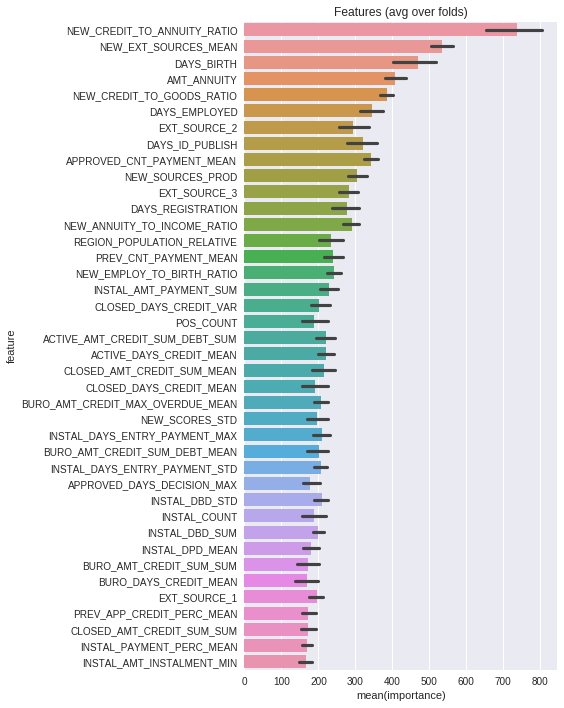

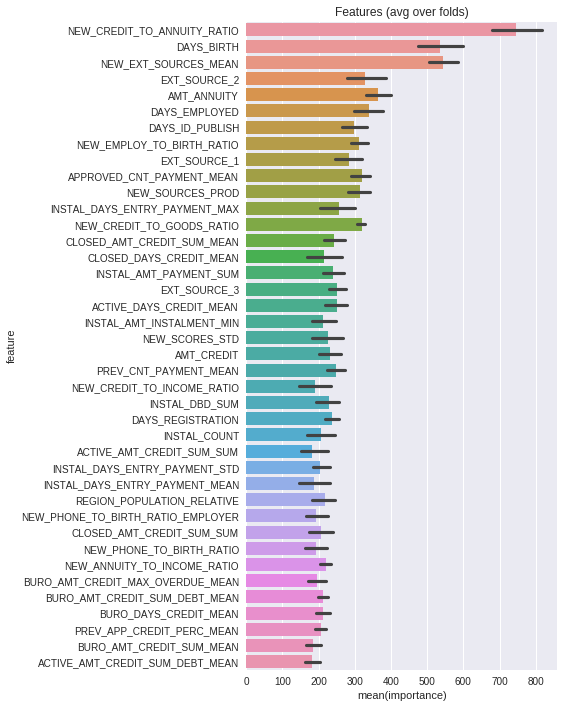

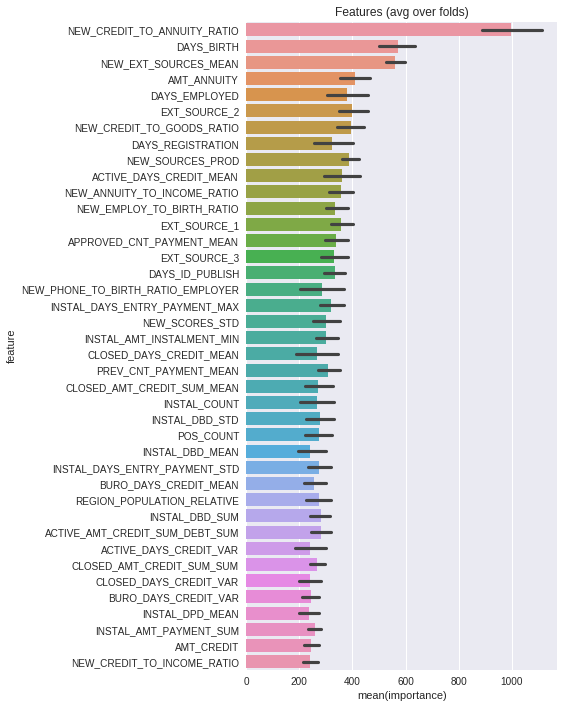

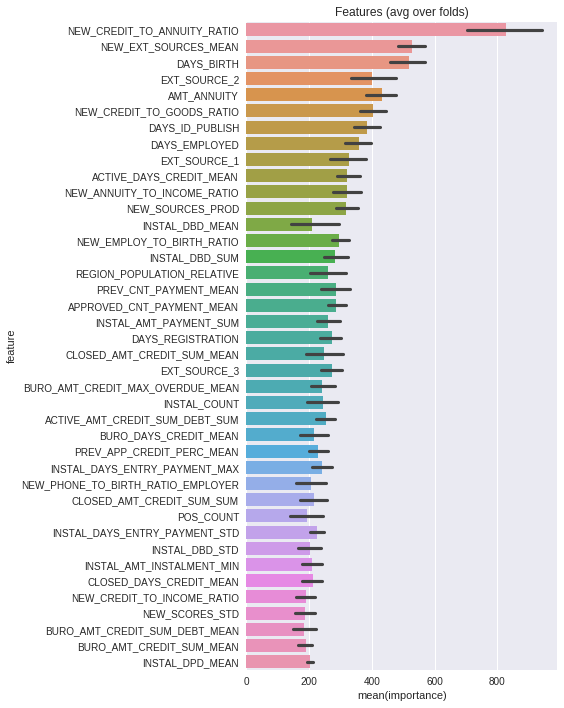

In [162]:
import time
from google.colab import files

if __name__ == "__main__":
    submission_file_name = "submission.csv"
    with timer("Full model run"):
        #main(False)
        split_execution(False)
        #ensemble(False)
    #time.sleep(30)
    #files.download(submission_file_name)

In [0]:
from google.colab import files
files.download(submission_file_name)